# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [3]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Список с названиями классов

In [4]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

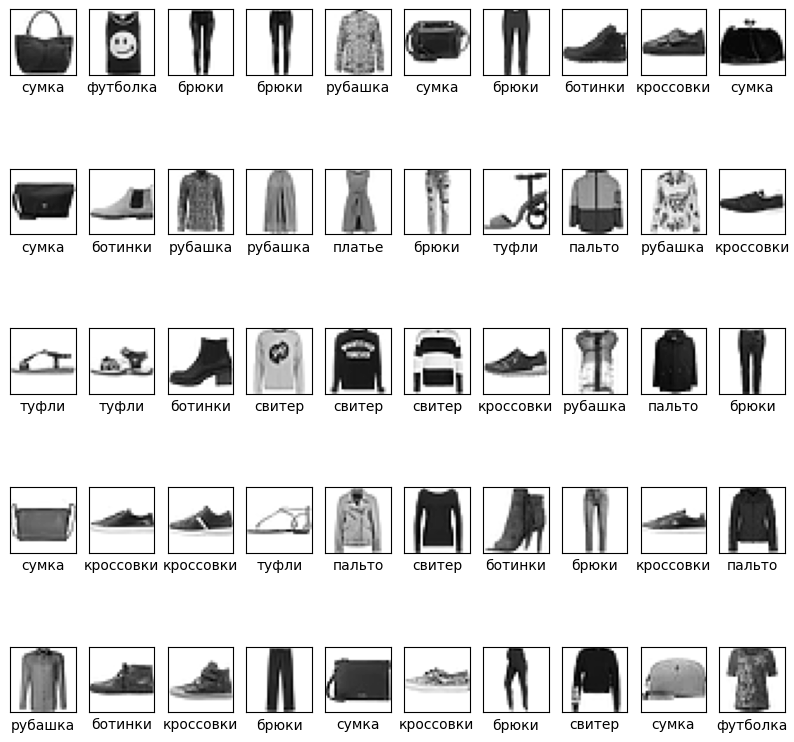

In [5]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [7]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [8]:
n = 0

In [9]:
print(y_train[n])

9


**Преобразуем метки в формат one hot encoding**

In [10]:
y_train = utils.to_categorical(y_train, 10)

In [11]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [12]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [13]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Обучаем нейронную сеть

In [16]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 1s 6ms/step - loss: 0.3163 - accuracy: 0.8901 - val_loss: 0.3553 - val_accuracy: 0.8756
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3150 - accuracy: 0.8913 - val_loss: 0.3544 - val_accuracy: 0.8765
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3146 - accuracy: 0.8908 - val_loss: 0.3558 - val_accuracy: 0.8747
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3136 - accuracy: 0.8919 - val_loss: 0.3549 - val_accuracy: 0.8738
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.8920 - val_loss: 0.3517 - val_accuracy: 0.8768
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3120 - accuracy: 0.8915 - val_loss: 0.3520 - val_accuracy: 0.8756
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3113 - accuracy: 0.8921 - val_loss: 0.3524 - val_accuracy: 0.8752

## Сохраняем нейронную сеть для последующего использования

In [17]:
model.save('fashion_mnist_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [18]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8786


In [20]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 87.86


## Используем сеть для распознавания предметов одежды

In [19]:
n_rec = 496

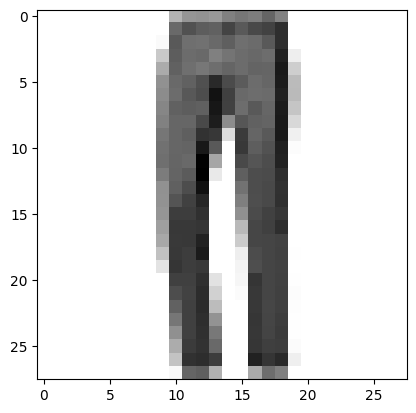

In [21]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [22]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [23]:
prediction = model.predict(x)

1/1 [==============================] - 0s 94ms/step


**Печатаем результаты распознавания**

In [24]:
prediction

array([[2.4361820e-05, 9.9994314e-01, 2.5173276e-06, 2.7253909e-05,
        2.2029344e-06, 6.1245453e-10, 1.4811516e-07, 6.2494916e-09,
        3.5630848e-07, 3.7698852e-10]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [25]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 1
Название класса: брюки


**Печатаем правильный ответ**

In [26]:
label = np.argmax(y_test[496])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 1
Название класса: брюки


## Загружаем свою картинку

In [41]:
files.upload()

Saving $_57.jfif to $_57.jfif


{'$_57.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xfe\x002Processed By eBay with ImageMagick, z1.1.0. ||B2\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xc2\x00\x0b\x08\x04\xb0\x04\xb0\x01\x01\x11\x00\xff\xc4\x00\x1b\x00\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xda\x00\x08\x01\x01\x00\x00\x00\x01\xfdP\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0f\x1f\xc8\xf4\xbd\xc9\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00|\xaf\xc8\xf3\xf7{\xfe\xc7\xb1p\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00e\xf1\xbf1\x87WGOW\xab\xeaz\x97\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008\xfe\x1f\xc0\x8d\xfazz4\xbe\x9d

Проверяем загрузку картинки

In [42]:
!ls

'$_57.jfif'		  futbolka-muzhskaia-roly-beagle-chernaia-744497.jpeg
 fashion_mnist_dense.h5   sample_data


Загружаем картинку из файла

In [43]:
img_path = '$_57.jfif'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

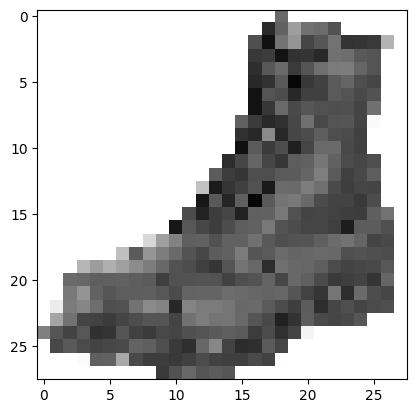

In [44]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [45]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [46]:
prediction = model.predict(x)

1/1 [==============================] - 0s 19ms/step


Результаты распознавания

In [47]:
prediction

array([[2.2413967e-06, 4.0580134e-10, 3.1651709e-08, 9.1560670e-09,
        1.4789979e-10, 6.9310125e-03, 1.0992227e-08, 2.0641132e-04,
        9.4357820e-05, 9.9276590e-01]], dtype=float32)

In [48]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 9
Название класса: ботинки


## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.


Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.